<a href="https://colab.research.google.com/github/Barikko/Yandex.Practicum-Projects/blob/main/%D0%A1%D0%B1%D0%BE%D1%80%D0%BD%D1%8B%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сборный проект №1

# Общая информация

Датасет, с которым предстоит работать, - исторические данные о продажах игр с 1980 по 2016 гг, в которых содержится информация о жанре, рейтинге, платформе и количества продаж игр по 3 регионам (Европа, Северная Америка, Япония). Цель - выявить закономерности и особенности, влияющие на успешность и продаваемость игры, чтобы спланировать рекламные компании, связанные с потенциально популярным продуктом.

План работы:
    
    1. Изучение общей информации о таблице
    2. Подготовка данных, разобраться с пропусками и преобразовать типы данных
    3. Исследовательский анализ данных, сравнение по годам, платформам, оценкам, продажам, рейтингу
    4. Выявление актуального периода для исследования, на основе анализа которого и будут составлены выводы и прогнозы
    5. Составление портрета пользователя каждого региона
    6. проверка гипотез
    7. Общий вывод

Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.




In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


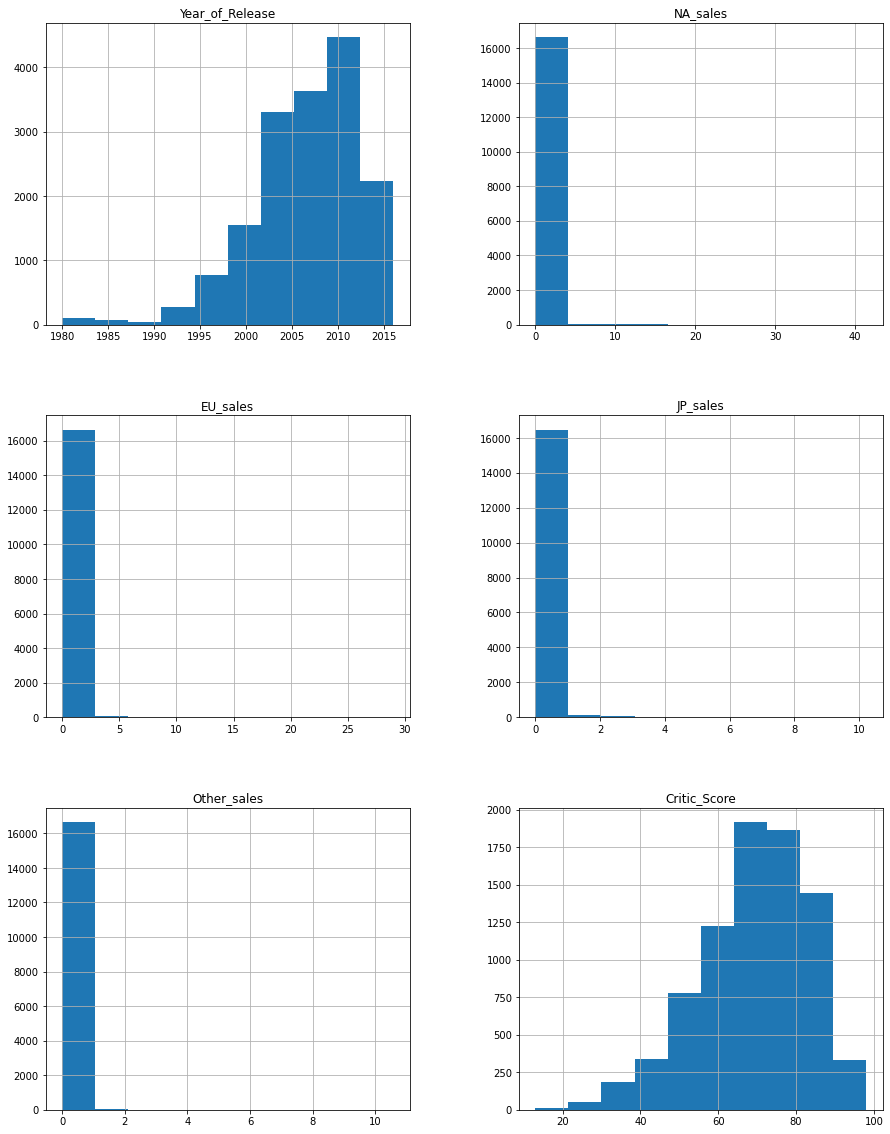

In [6]:
data = pd.read_csv('/content/sample_data/games.csv')
display(data.columns)
display(data.info())
display(data.head(5))
data.hist(figsize=(15, 20));

# Подготовка данных

## Приводим названия к нижнему регистру

In [7]:
data.columns = data.columns.str.lower()

## Преобразуем данные в нужные типы

Замена данных требовалась только для года и для параметра critic_score, который был преобразован из float в int. Неочевидных дубликатов не обнаружено.

In [8]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
print(data['platform'].unique())
print(data['genre'].unique())
print(data['rating'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


## Избавляемся от пропусков 
Строки с пропусками в  year_of_release, genre, name удалены. В user_score и critic_score пропуски заменены на TBD, что означает to be determined - подлежит уточнению, то есть данных об оценке пока нет. Пропуски столбца rating заменены на RP (Rating Pending) — Рейтинг ожидается.

Откуда могли взяться пропуски? Некорректный ввод данных, недостаточное количество информации об игре, оценка игры ещё может быть не завершена, её рейтинг ещё не определён, либо наоборот, игра настолько старая, что не сохранилось или не было изначально данных о её рейтинге, оценке игроков/критиков. 

In [9]:
print(data.isna().sum())
data['user_score']=data['user_score'].fillna('TBD')
data['critic_score']=data['critic_score'].fillna('TBD')
data['user_score'] = data['user_score'].replace('tbd','TBD')
data['name']=data['name'].dropna()
data['year_of_release']=data['year_of_release'].dropna()
data['genre']=data['genre'].dropna()    
data['rating']=data['rating'].fillna('RP')

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


## Cуммарные продажи во всех регионах

In [10]:
data['sum'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# Исследовательский анализ данных


## Cколько игр выпускалось в разные годы:

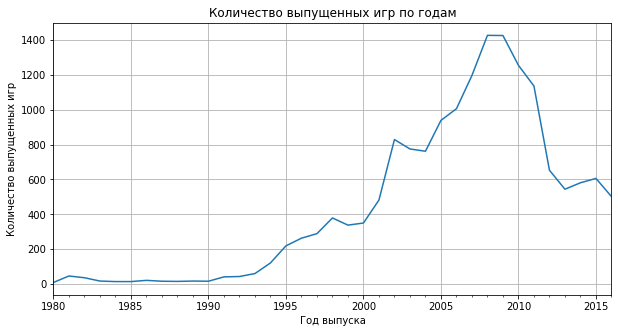

In [11]:
data.pivot_table(index = 'year_of_release',values='name', aggfunc='count')\
.plot(grid=True, figsize=(10, 5), legend = False,\
            title='Количество выпущенных игр по годам',ylabel = 'Количество выпущенных игр', xlabel='Год выпуска');

В период с 1980 по 1994 количество выходивших игр в год даже не достигало 200, этот период не является важным для исследования, так как информационные технологии и геймдев в частности только начинали развиваться и становиться массовыми. После 1994 года количество выходивших игр увеличивалось с каждым годом. Пик же игростроения пришёл на 2007-2011 года, когда их количество было свыше 1000 в год. Далее идёт спад.

## Как менялись продажи по платформам: 

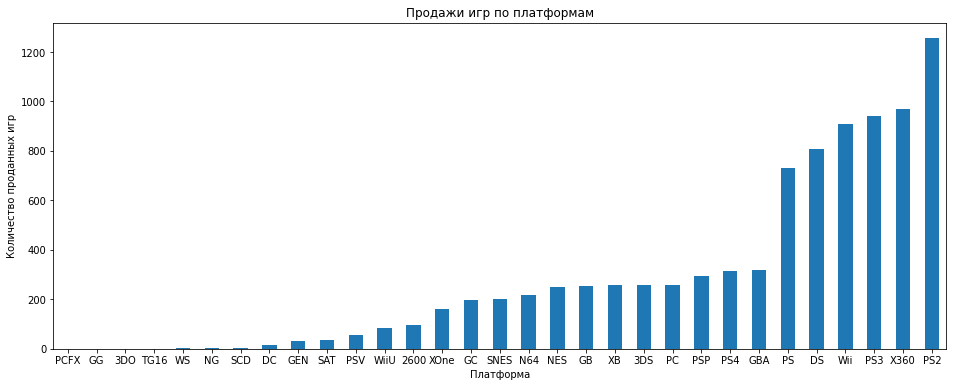

In [12]:
data.pivot_table(index = 'platform',values='sum', aggfunc = 'sum').sort_values(by='sum')\
.plot(kind = 'bar', figsize=(16, 6),title='Продажи игр по платформам' ,\
      legend = False, ylabel = 'Количество проданных игр', xlabel='Платформа')
plt.xticks(rotation=0);

Лидерами по продажам за всё время являются PS2 (>1200 игр), DS (>800 игр), PS3 (900 игр), Wii (900 игр), X360(1000 игр). Не самое корректное сравнение данных, ведь современные платформы (PC, XOne, PS4 (на 2016 год) ещё не вышли из использования. Также в прошлом конкуренция платформ была меньше, ведь рынок только начинал развиваться.

## Платформы с наибольшими суммарными продажами и их постройте распределение по годам:

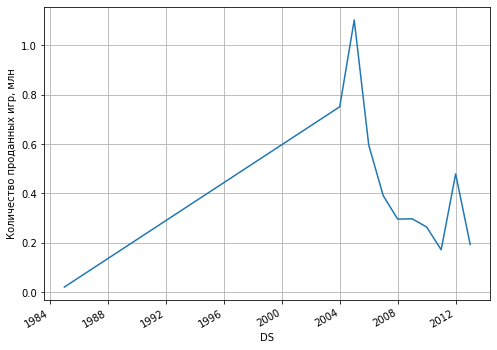

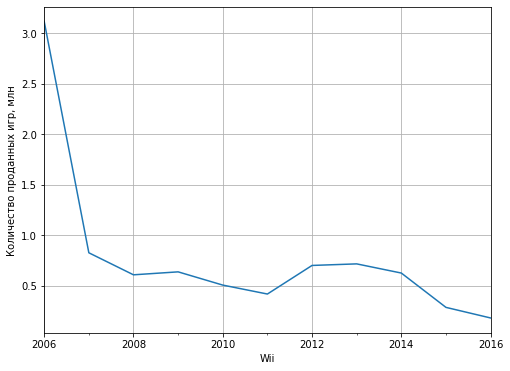

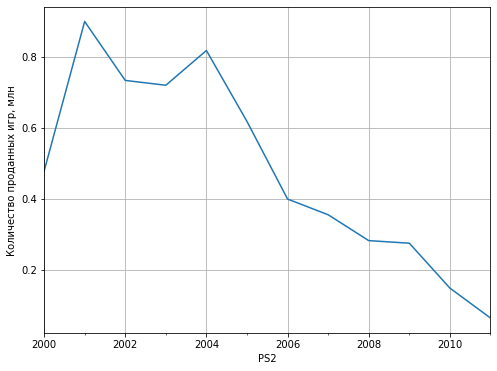

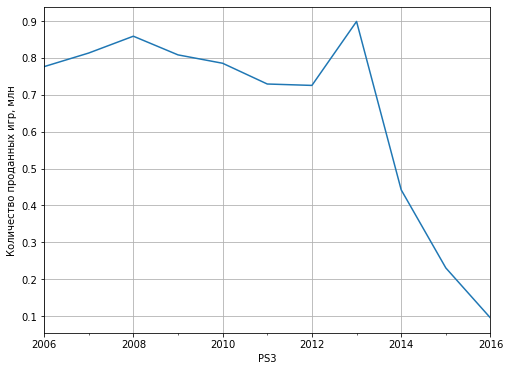

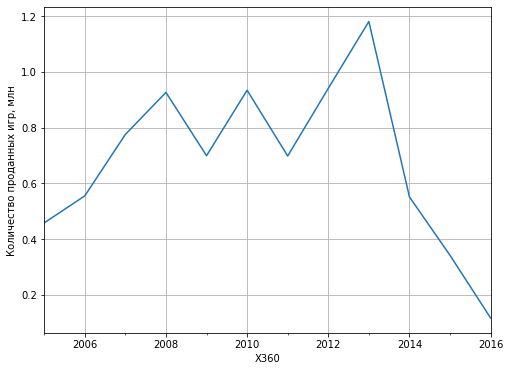

In [13]:
(data.query('platform=="DS"').pivot_table(index = 'year_of_release',values='sum')
 .plot(grid=True, figsize=(8, 6), legend = False, ylabel = 'Количество проданных игр, млн', xlabel='DS'))

(data.query('platform=="Wii"').pivot_table(index = 'year_of_release',values='sum')
 .plot(grid=True, figsize=(8, 6), legend = False, ylabel = 'Количество проданных игр, млн', xlabel='Wii'))

(data.query('platform=="PS2"').pivot_table(index = 'year_of_release',values='sum')
 .plot(grid=True, figsize=(8, 6), legend = False, ylabel = 'Количество проданных игр, млн', xlabel='PS2'))

(data.query('platform=="PS3"').pivot_table(index = 'year_of_release',values='sum')
 .plot(grid=True, figsize=(8, 6), legend = False, ylabel = 'Количество проданных игр, млн', xlabel='PS3'))

(data.query('platform=="X360"').pivot_table(index = 'year_of_release',values='sum')
 .plot(grid=True, figsize=(8, 6), legend = False, ylabel = 'Количество проданных игр, млн', xlabel='X360'));

Обычно цикл жизни платформы составляет около 8 лет, для дальнейшего исследования возьмём актуальный период за 6 лет.

In [14]:
data_new = data.query('year_of_release > 2012')

## Сравнение платформ в актуальном периоде:

['PS3' 'X360' 'PS4' '3DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'DS' 'PSP']


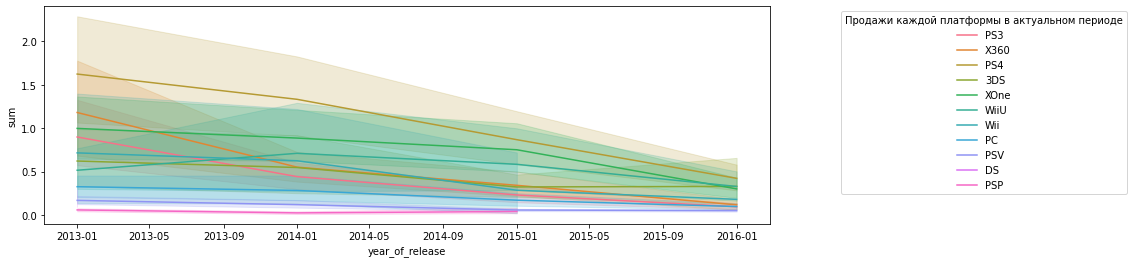

In [15]:
print(data_new['platform'].unique())
plt.figure(figsize=(13, 4))
sns.lineplot(x='year_of_release', y='sum', hue='platform', data=data_new).legend(bbox_to_anchor=(1.5, 1), loc='upper right')\
.set(title='Продажи каждой платформы в актуальном периоде');

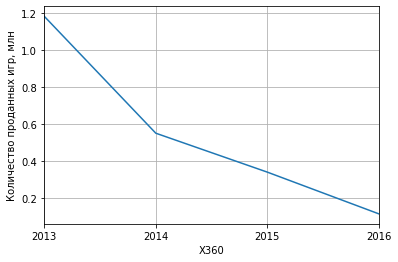

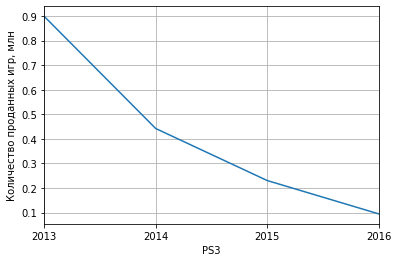

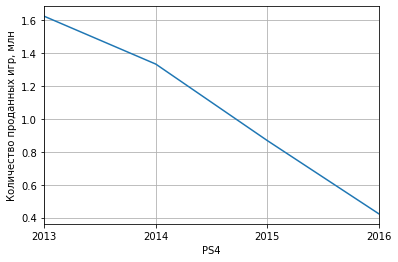

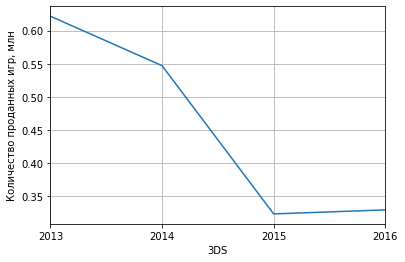

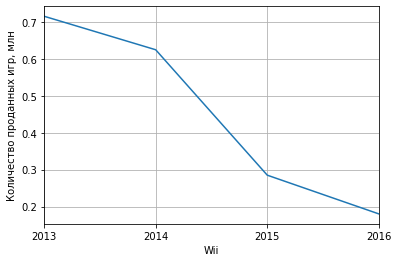

In [16]:
(data_new.query('platform=="X360"').pivot_table(index = 'year_of_release',values='sum')
 .plot(grid=True, figsize=(6, 4), legend = False, ylabel = 'Количество проданных игр, млн', xlabel='X360'))

(data_new.query('platform=="PS3"').pivot_table(index = 'year_of_release',values='sum')
 .plot(grid=True, figsize=(6, 4), legend = False, ylabel = 'Количество проданных игр, млн', xlabel='PS3'))

(data_new.query('platform=="PS4"').pivot_table(index = 'year_of_release',values='sum')
 .plot(grid=True, figsize=(6, 4), legend = False, ylabel = 'Количество проданных игр, млн', xlabel='PS4'))

(data_new.query('platform=="3DS"').pivot_table(index = 'year_of_release',values='sum')
 .plot(grid=True, figsize=(6, 4), legend = False, ylabel = 'Количество проданных игр, млн', xlabel='3DS'))

(data_new.query('platform=="Wii"').pivot_table(index = 'year_of_release',values='sum')
 .plot(grid=True, figsize=(6, 4), legend = False, ylabel = 'Количество проданных игр, млн', xlabel='Wii'));

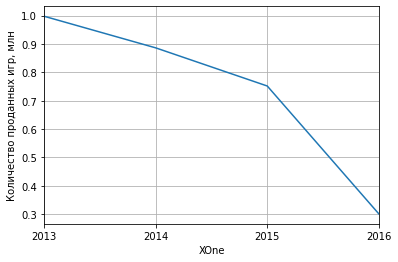

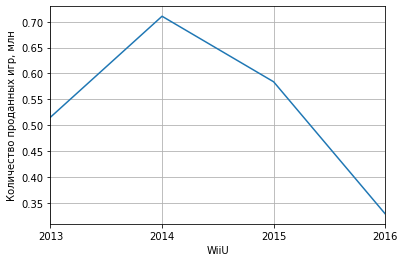

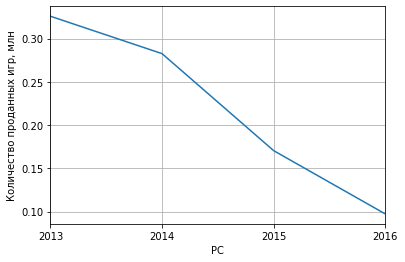

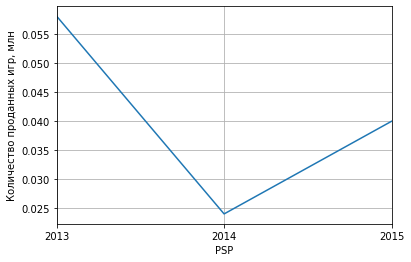

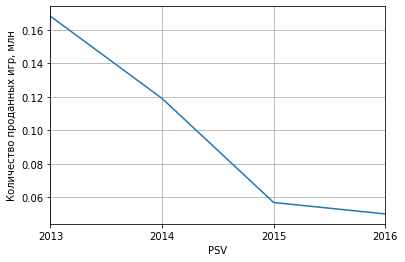

In [17]:
(data_new.query('platform=="XOne"').pivot_table(index = 'year_of_release',values='sum')
 .plot(grid=True, figsize=(6, 4), legend = False, ylabel = 'Количество проданных игр, млн', xlabel='XOne'))

(data_new.query('platform=="WiiU"').pivot_table(index = 'year_of_release',values='sum')
 .plot(grid=True, figsize=(6, 4), legend = False, ylabel = 'Количество проданных игр, млн', xlabel='WiiU'))

(data_new.query('platform=="PC"').pivot_table(index = 'year_of_release',values='sum')
 .plot(grid=True, figsize=(6, 4), legend = False, ylabel = 'Количество проданных игр, млн', xlabel='PC'))

(data_new.query('platform=="PSP"').pivot_table(index = 'year_of_release',values='sum')
 .plot(grid=True, figsize=(6, 4), legend = False, ylabel = 'Количество проданных игр, млн', xlabel='PSP'))

(data_new.query('platform=="PSV"').pivot_table(index = 'year_of_release',values='sum')
 .plot(grid=True, figsize=(6, 4), legend = False, ylabel = 'Количество проданных игр, млн', xlabel='PSV'));

Потенциально прибыльные платформы: WiiU, XBox One, PC, PS4. Они стабильно популярны и на них покупают много игр, это актуальные платформы последнего на момент исследования поколения. На графике к 2016 они все теряют в продажах, но нам известно, что данные не за весь год, соответственно, это нормальное падение.

Такие платформы, как Wii, PS3, XBOX360, PSP, PS2, 3DS, PSP, DS теряют свою популярность и продажи с каждым годом. Они являются устаревшими платформами, которые уже не поддерживаются и не обновляются, они невыгодны. PSVita, хоть и я является новой платформой, имеет мало продаж и невыгодна. 

## График «ящик с усами» по глобальным продажам игр в разбивке по платформам:

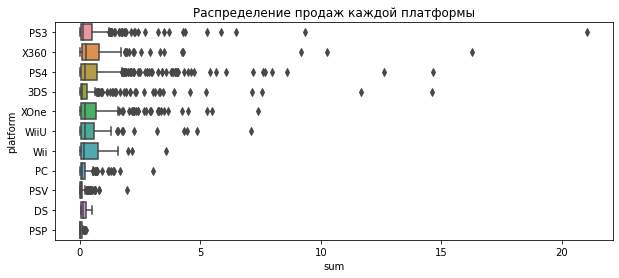

In [18]:
plt.figure(figsize=(10, 4))
sns.boxplot(y="platform", x="sum", data=data_new, orient="h").set(title='Распределение продаж каждой платформы');

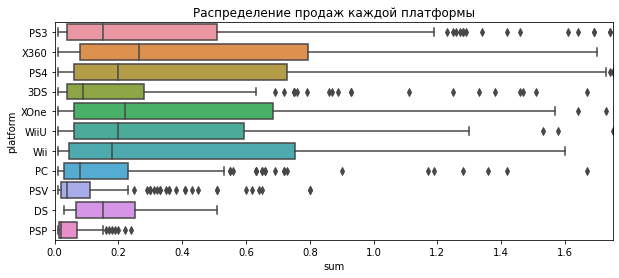

In [19]:
plt.figure(figsize=(10, 4))
plt.xlim(0,1.75)
sns.boxplot(y="platform", x="sum", data=data_new, orient="h").set(title='Распределение продаж каждой платформы');

Наибольший размах и разброс у платформ X360, PS3, DS, более стабильны PS4, Wii, XOne. Наименьший размах имеют PSP, PSV, PS2.

## Как влияют на продажи внутри платформы PS3 отзывы пользователей и критиков:

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Корреляция продаж PS3 с отзывами критиков: 0.33
Корреляция продаж PS3 с отзывами игроков: 0.00239


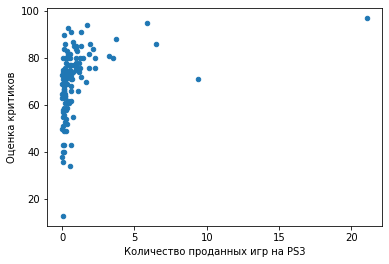

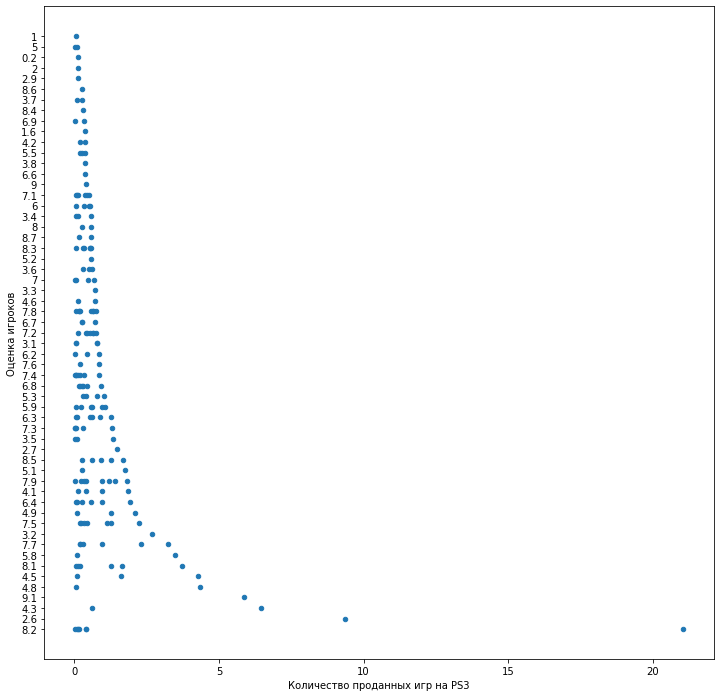

In [20]:
data_new.query('platform=="PS3" & critic_score!="TBD"')\
.plot(x='sum', y='critic_score', kind = 'scatter',ylabel = 'Оценка критиков', xlabel='Количество проданных игр на PS3')
data_new.query('platform=="PS3" & user_score!="TBD"')\
.plot(x='sum', y='user_score', kind = 'scatter', ylabel = 'Оценка игроков', xlabel='Количество проданных игр на PS3', figsize =(12,12))
print('Корреляция продаж PS3 с отзывами критиков: %.2f'%data_new.query('platform=="PS3" & critic_score!="TBD"')['critic_score']
      .astype('int').corr(data_new['sum']))
print('Корреляция продаж PS3 с отзывами игроков: %.5f'%data_new.query('platform=="PS3"& user_score!="TBD"')['user_score']
      .astype('float').corr(data_new['sum']))

Отзывы и критиков, и пользователей не влияют на продажи игр на платформе PS3.

## Сравнение выводов с продажами игр на других платформах:

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Корреляция продаж X360 с отзывами критиков: 0.35
Корреляция продаж X360 с отзывами игроков: -0.01
Корреляция продаж XOne с отзывами критиков: 0.42
Корреляция продаж XOne с отзывами игроков: -0.07


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Корреляция продаж PC с отзывами критиков: 0.20
Корреляция продаж PC с отзывами игроков: -0.09


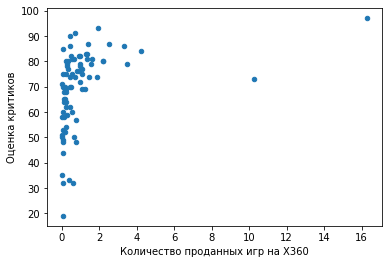

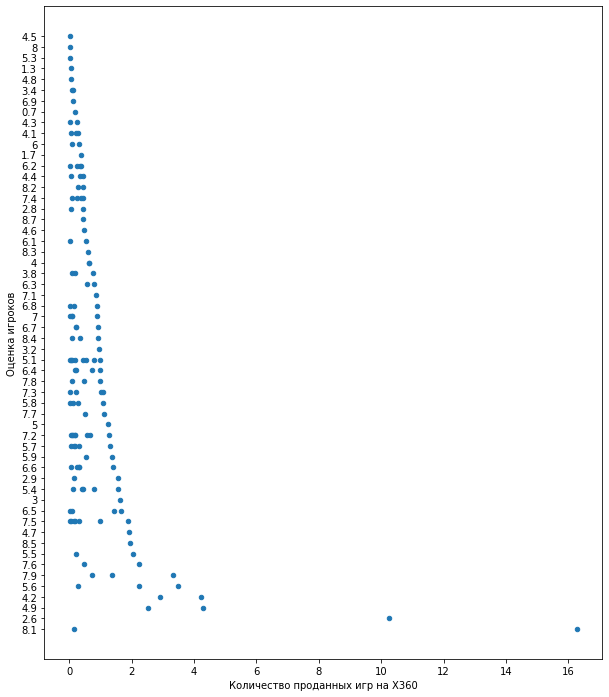

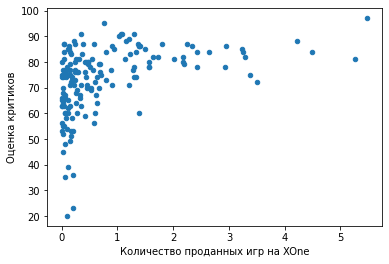

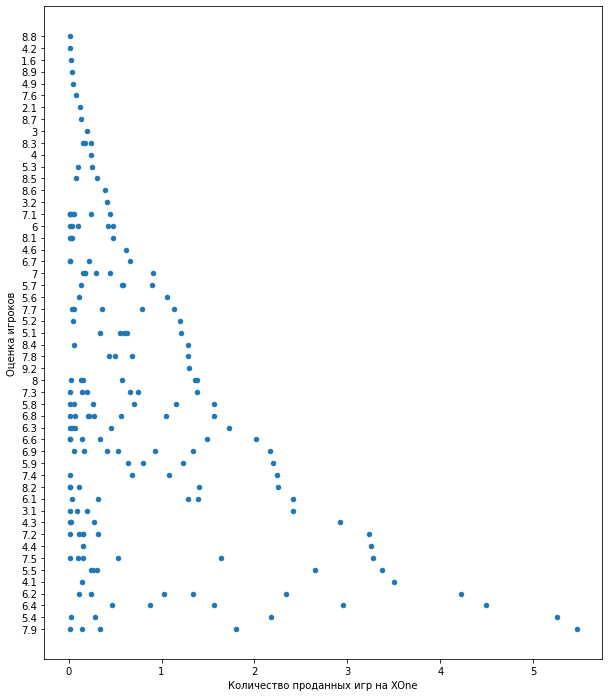

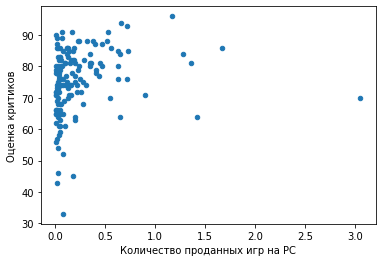

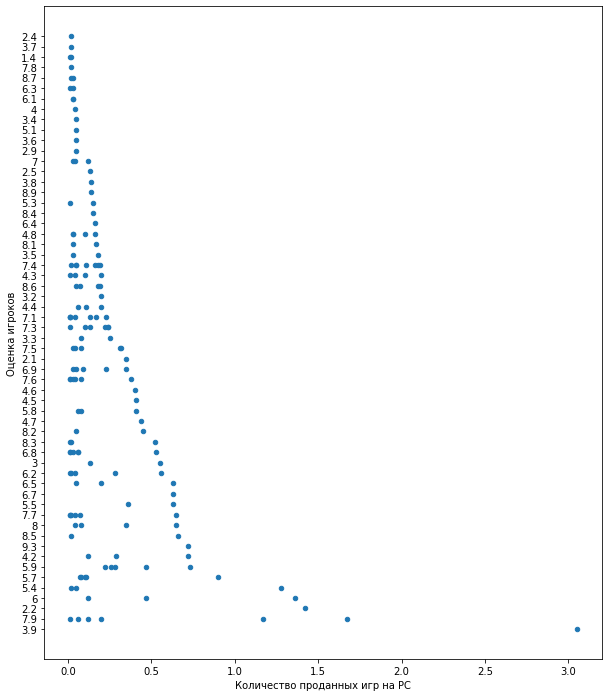

In [21]:
data_new.query('platform=="X360" & critic_score!="TBD"')\
.plot(x='sum', y='critic_score', kind = 'scatter', ylabel = 'Оценка критиков', xlabel='Количество проданных игр на X360');
data_new.query('platform=="X360" & user_score!="TBD"')\
.plot(x='sum', y='user_score', kind = 'scatter', ylabel = 'Оценка игроков', xlabel='Количество проданных игр на X360',figsize =(10,12));
print('Корреляция продаж X360 с отзывами критиков: %.2f'%data_new.query('platform=="X360" & critic_score!="TBD"')['critic_score']
      .astype('int').corr(data_new['sum']));
print('Корреляция продаж X360 с отзывами игроков: %.2f'%data_new.query('platform=="X360"& user_score!="TBD"')['user_score']
      .astype('float').corr(data_new['sum']));

data_new.query('platform=="XOne" & critic_score!="TBD"')\
.plot(x='sum', y='critic_score', kind = 'scatter', ylabel = 'Оценка критиков', xlabel='Количество проданных игр на XOne');
data_new.query('platform=="XOne" & user_score!="TBD"')\
.plot(x='sum', y='user_score', kind = 'scatter', ylabel = 'Оценка игроков', xlabel='Количество проданных игр на XOne',figsize =(10,12));
print('Корреляция продаж XOne с отзывами критиков: %.2f'%data_new.query('platform=="XOne" & critic_score!="TBD"')['critic_score']
      .astype('int').corr(data_new['sum']))
print('Корреляция продаж XOne с отзывами игроков: %.2f'%data_new.query('platform=="XOne"& user_score!="TBD"')['user_score']
      .astype('float').corr(data_new['sum']))

data_new.query('platform=="PC" & critic_score!="TBD"')\
.plot(x='sum', y='critic_score', kind = 'scatter', ylabel = 'Оценка критиков', xlabel='Количество проданных игр на PC');
data_new.query('platform=="PC" & user_score!="TBD"')\
.plot(x='sum', y='user_score', kind = 'scatter', ylabel = 'Оценка игроков', xlabel='Количество проданных игр на PC',figsize =(10,12));
print('Корреляция продаж PC с отзывами критиков: %.2f'%data_new.query('platform=="PC" & critic_score!="TBD"')['critic_score']
      .astype('int').corr(data_new['sum']))
print('Корреляция продаж PC с отзывами игроков: %.2f'%data_new.query('platform=="PC"& user_score!="TBD"')['user_score']
      .astype('float').corr(data_new['sum']))

Диаграммы рассеяния одинаковы для всех платформ, то есть оценки критиков и игроков одинаково не влияют на продажи игр на всех платформах, эти показаетли слабо коррелируют друг с другом.

## Общее распределение игр по жанрам:

In [22]:
data_new.groupby('genre')['genre'].count().sort_values(ascending=False).head(15)

genre
Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

Самый популярный жанр с троекратным отрывом - Action, за ним с минимальной друг от друга разницей идут Role-Playing, Adventure, Sports и Shooter. Наименее популярые жанры - Strategy, Simulation, Puzzle.

## Распределение продаж по жанрам:

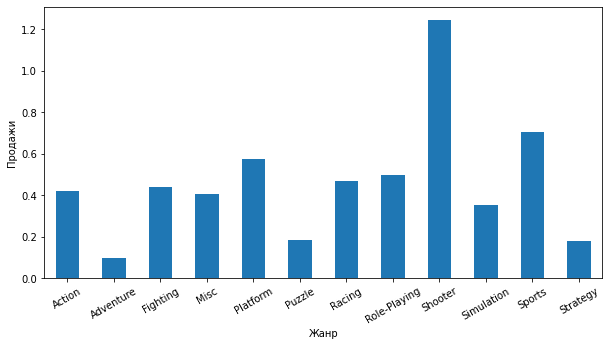

In [25]:
data_new.pivot_table(index='genre',values='sum', aggfunc = 'mean')\
.plot(kind='bar', ylabel = 'Продажи', xlabel='Жанр', legend = False, figsize=(10,5))
plt.xticks(rotation=30);

Самые стабильно прибыльные жанры - Platform, Shooter, Sports, Action. Самые непопулярные жанры - Strategy, Puzzle, Adventrue.

# Портрет пользователя каждого региона


## Самые популярные платформы:

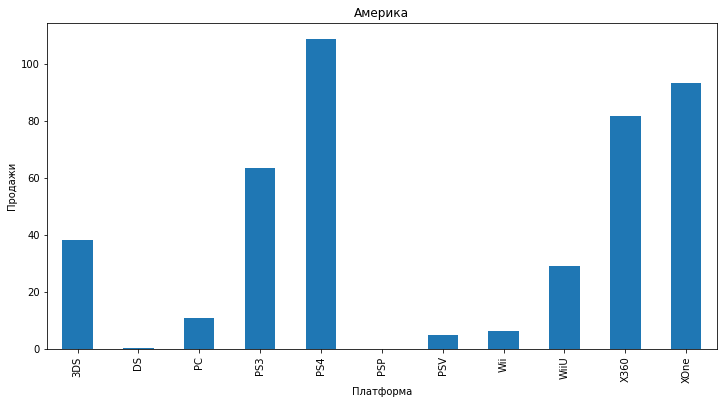

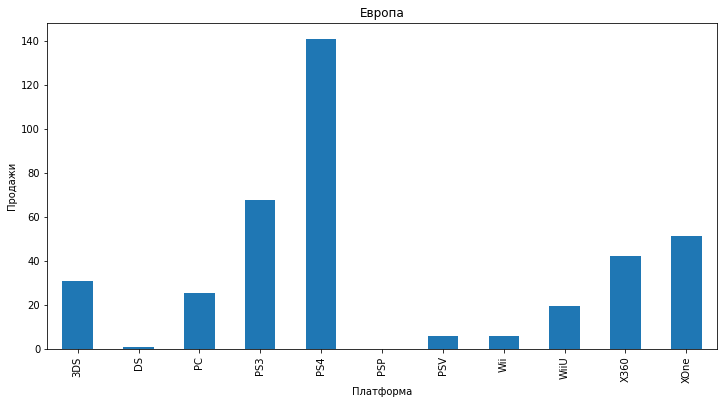

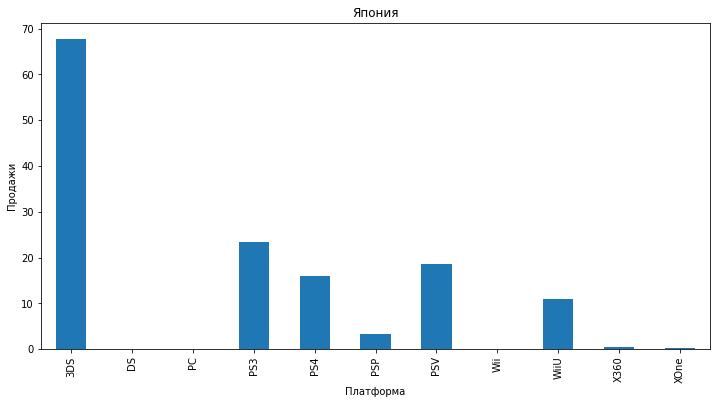

In [28]:
(data_new.pivot_table(index = 'platform',values='na_sales', aggfunc = 'sum')
     .plot(kind = 'bar', figsize=(12, 6), legend = False, ylabel = 'Продажи', xlabel='Платформа', title = 'Америка'))

(data_new.pivot_table(index = 'platform',values='eu_sales', aggfunc = 'sum')
     .plot(kind = 'bar', figsize=(12, 6), legend = False, ylabel = 'Продажи', xlabel='Платформа', title = 'Европа'))

(data_new.pivot_table(index = 'platform',values='jp_sales', aggfunc = 'sum')
     .plot(kind = 'bar', figsize=(12, 6), legend = False, ylabel = 'Продажи', xlabel='Платформа', title = 'Япония'));

Самые популярные платформы в Америке: PS4(110 млн), XOne(90 млн), X360(80 млн), PS3(60 млн), 3DS(40 млн)

В Европе: PS4 (140 млн), PS3 (70 млн), XOne (50 млн), X360 (40 млн), 3DS (30 млн)

В Японии: 3DS (70 млн), PS3 (25 млн), PSV (20 млн), PS4 (17 млн), WiiU (12 млн)

В Америке в полтора раза от следующей платформы отрываются XBox360, XOne и PS4, далее разница становится меньшей. В европейском регионе продажи игр на всех платформах примерно одинаковы, за исключением большого отрыва PS4 и PS3. В Японии в два раза популярней остальных платформа 3DS, следующие примерно равны.

## Самые популярные жанры:

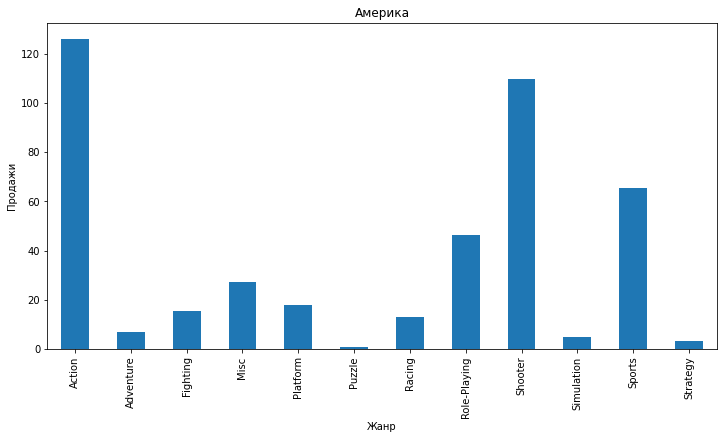

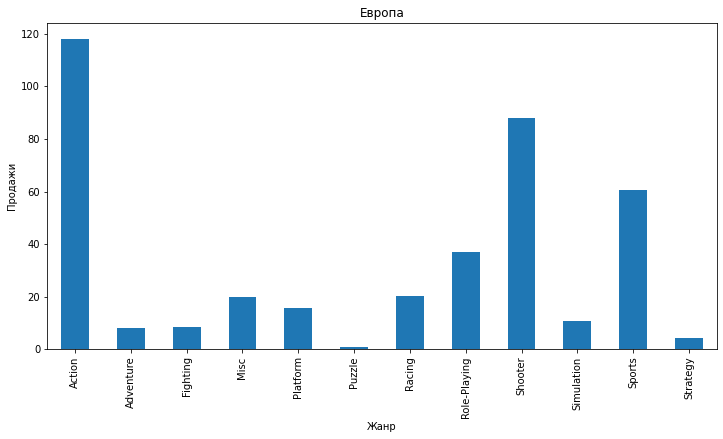

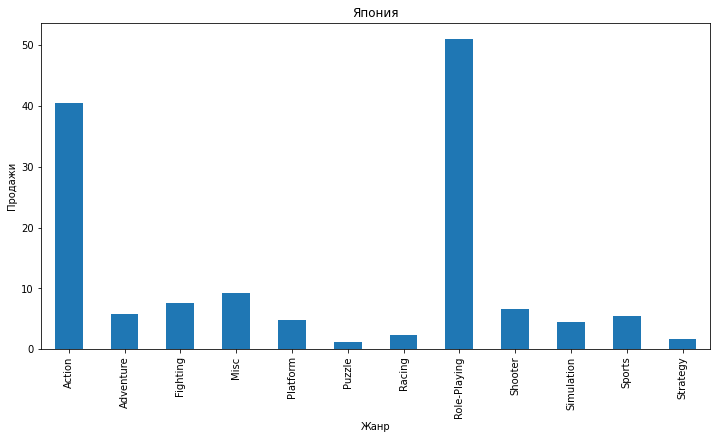

In [30]:
(data_new.pivot_table(index = 'genre',values='na_sales', aggfunc = 'sum')
     .plot(kind = 'bar', figsize=(12, 6), legend = False, ylabel = 'Продажи', xlabel='Жанр', title = 'Америка'))

(data_new.pivot_table(index = 'genre',values='eu_sales', aggfunc = 'sum')
     .plot(kind = 'bar', figsize=(12, 6), legend = False, ylabel = 'Продажи', xlabel='Жанр', title = 'Европа'))

(data_new.pivot_table(index = 'genre',values='jp_sales', aggfunc = 'sum')
     .plot(kind = 'bar', figsize=(12, 6), legend = False, ylabel = 'Продажи', xlabel='Жанр', title = 'Япония'));

Самые популярные жанры в Америке: Action(125 млн), Shooter (110 млн), Sports(65 млн), Role-playing (40 млн), Misc (30 млн)
 
Европа: Action (120 млн), Shooter (80 млн), Sports (60 млн), Role-Playing (40 млн), Misc (20 млн)
 
Япония: Rpg (55 млн), Action (40 млн), Misc(10 млн), Fighting (10 млн), Shooter (5 млн)
 
В европейской и американском регионах популярны одинаковые жанры, и сами жанры слабо отличаются друг от друга по популярности. В Японии ситуация интереснее, с многократным отрывом лидируют жанры RPG и Action, остальные же слабопопулярны и равны между собой.

## Влияние рейтинга ESRB на продажи:

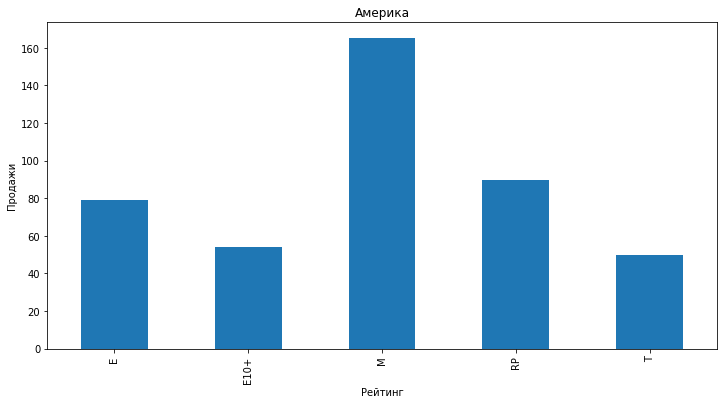

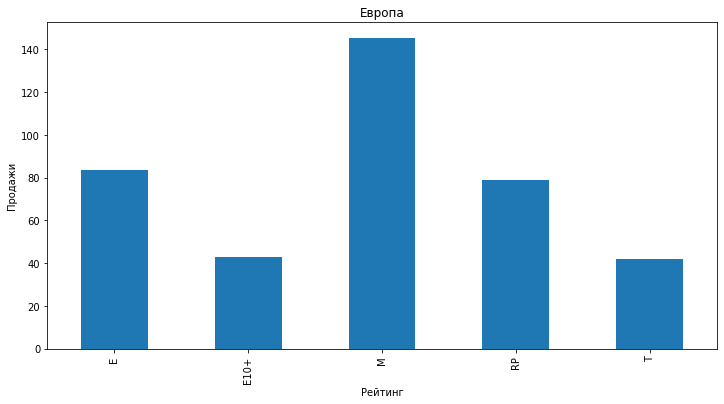

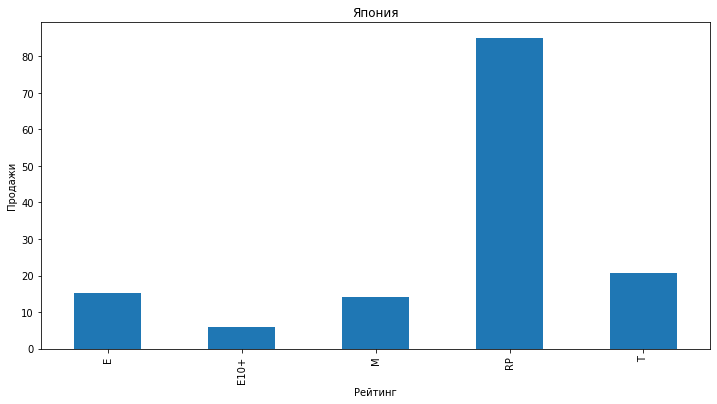

In [31]:
(data_new.pivot_table(index = 'rating',values='na_sales', aggfunc = 'sum')
     .plot(kind = 'bar', figsize=(12, 6), legend = False, ylabel = 'Продажи', xlabel='Рейтинг', title = 'Америка'))

(data_new.pivot_table(index = 'rating',values='eu_sales', aggfunc = 'sum')
     .plot(kind = 'bar', figsize=(12, 6), legend = False, ylabel = 'Продажи', xlabel='Рейтинг', title = 'Европа'))

(data_new.pivot_table(index = 'rating',values='jp_sales', aggfunc = 'sum')
     .plot(kind = 'bar', figsize=(12, 6), legend = False, ylabel = 'Продажи', xlabel='Рейтинг', title = 'Япония'));

Рейтинг ESRB на продажи в Европе или Америке не влияет, самая продаваемая категория - М, "Для взрослых", но такой серьёзный рейтинг не уменьшает количество продаж игр.

В японском регионе рейтинг влияет на продаваемость игры, там самые продаваемые категории (не считая аномального большого количества игр без рейтинга) - "Для всех" и "Для подростков", а категория "Для взрослых" находится на третьем месте.

# Гипотезы

## Гипотеза 1
Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Альтернативная: средние пользовательские рейтинги платформ Xbox One и PC не равны

In [32]:
alpha=.05
results = st.ttest_ind(data_new.query('platform=="XOne" & user_score!="TBD"')['user_score'].astype('float'), 
                       data_new.query('platform=="PC"& user_score!="TBD"')['user_score'].astype('float'))

print('p-значение:', results.pvalue)
if results.pvalue<alpha:
      print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Средние оценки на платформе XOne:  %.2f'%data_new.query('platform=="XOne" & user_score!="TBD"')['user_score']
      .astype('float').mean())
print('Средние оценки на платформе PC:    %.2f'%data_new.query('platform=="PC"& user_score!="TBD"')['user_score']
      .astype('float').mean())

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу
Средние оценки на платформе XOne:  6.52
Средние оценки на платформе PC:    6.27


Нулевая гипотеза не отвергнута, средние пользовательские оценки на PC и на XOne одинаковые (6.52 и 6.27).

## Гипотеза 2
Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports равны.

In [33]:
results2 = st.ttest_ind(data_new.query('genre=="Action" & user_score!="TBD"')['user_score'].astype('float'), 
                       data_new.query('genre=="Sports" & user_score!="TBD"')['user_score'].astype('float'))
#ttest_2samp, ttest_1samp, ttest_ind
print('p-значение:', results2.pvalue)
if results2.pvalue<alpha:
      print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Средняя оценка в жанре Action: %.2f'%data_new.query('genre=="Action" & user_score!="TBD"')['user_score'].astype('float').mean()) 
print('Средняя оценка в жанре Sports: %.2f'%data_new.query('genre=="Sports" & user_score!="TBD"')['user_score'].astype('float').mean())

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу
Средняя оценка в жанре Action: 6.84
Средняя оценка в жанре Sports: 5.24


Нулевая гипотеза отвергнута, средние оценки пользователей жанров Action и Sports слабо отличаются (6.8 и 5.2).

# Шаг 6. Общий вывод

Игры начали развиваться и выпускаться в большой количестве с 1995 года, а их пик по количеству пришёлся на  2007-2011 гг. Самые популярные платформы за всё время – PS2 (1200 вфыпущенных игр за всё время), XBox360 (1000 игр), PlayStation 3 (900), но прогноз на основе этого нельзя составлять, так как актуальный период ещё не был применен.

Актуальным периодом для прогноза на 2017 год был выбран период с 2013 года.

На конец 2016 года прибыльными консолями можно назвать WiiU, XBox One, PC, PS4, они являются развивающимися консолями  последнего поколения.

Из исследования видно, что оценки критиков и игроков не влияют на продажи игры. Также не влияет и рейтинг, самые покупаемые игры в европейском и американском сегментах имеют самый выскоий рейтинг M – «для взрослых», только в японском регионе самая популярная категория - "Для всех".

Самый популярный жанр с троекратным отрывом - Action, за ним с минимальной друг от друга разницей идут Role-Playing, Adventure, Sports и Shooter. Наименее популярые жанры - Strategy (Стратегия), Simulation (Симулятор), Puzzle (Пазл).

Самые стабильно прибыльные жанры - Platform, Shooter, Sports, Action. Самые непопулярные жанры - Strategy, Puzzle, Adventrue.

В Америке и Европе самые популярные платформы одинаковы - PS3 и XBox360, японский регион, как обычно, отличается от остальных - в нём самая популярная платформа 3DS. 

Распредление по жанрам имеет такую же концепцию - В Америке и Европе преобладают Action (250 млн продаж суммарно), Shooter (190 млн), Sports (125 млн), а в Японии RPG (55 млн), Action (40 млн), Misc (10 млн).

Первая нулевая гипотеза ("Средние пользовательские рейтинги платформ Xbox One и PC одинаковые") не отвергнута, средние пользовательские оценки на PC и на XOne одинаковые (6.52 и 6.27).
Вторая нулевая гипотеза ("Средние пользовательские рейтинги жанров Action и Sports разные") отвергнута, средние оценки пользователей жанров Action и Sports слабо отличаются (6.8 и 5.2).

Составляя прогноз на 2017 год, можно утверждать, что финансово успещными и растущими в популярности будут такие платформы, как PS4, XBoxOne, PC, жанры, на которые стоит обратить внимание - Action, Sports, Shooter.